Install Dependencies, work around for seaborn installation

In [ ]:
import sys
!{sys.executable} -m pip install seaborn

In [48]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics

  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 215kB 2.8MB/s ta 0:00:01
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [53]:
digits = load_digits()

print ("Image Data Shape", digits.data.shape)
print ("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


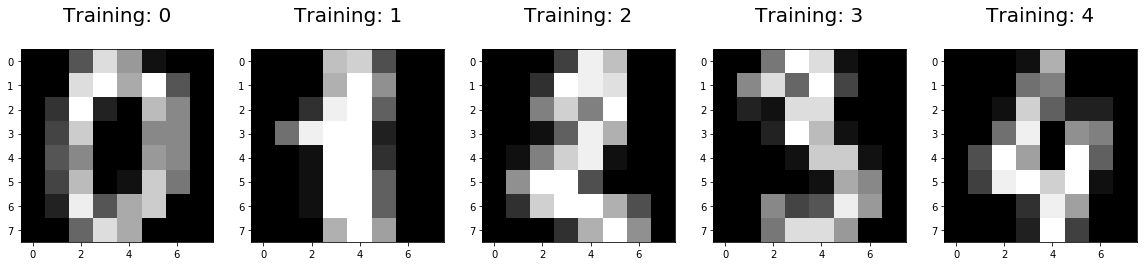

In [54]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
	plt.subplot(1,5,index+1)
	plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
	plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()

In [55]:
# Dividing the dataset into Training and Test set
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

print('Shape of X_Training set : ', x_train.shape)
print('Shape of Y_Training set : ', y_train.shape)
print('Shape of X_Testing set : ', x_test.shape)
print('Shape of Y_Testing set : ', y_test.shape)

Shape of X_Training set :  (1383, 64)
Shape of Y_Training set :  (1383,)
Shape of X_Testing set :  (414, 64)
Shape of Y_Testing set :  (414,)


In [56]:
# Making an instance of the model and training it
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

# Predicting the output of the first element of the test set
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [57]:
# Predicting the entire dataset
predictions = logisticRegr.predict(x_test)

# Determining the accuracy of the model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9420289855072463


In [58]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


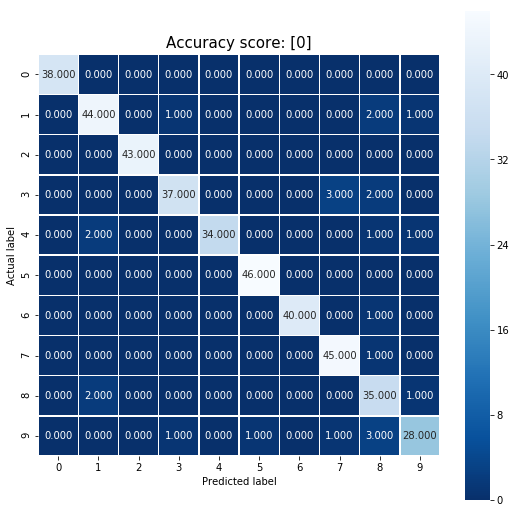

In [59]:
#Representing the confusion matrix in a heat map
plt.figure(figsize=(9,9))
sb.heatmap(cm, annot=True, fmt=".3f", linewidth=0.5, square=True, cmap="Blues_r");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy score: [0]'.format(score)
plt.title(all_sample_title, size=15);

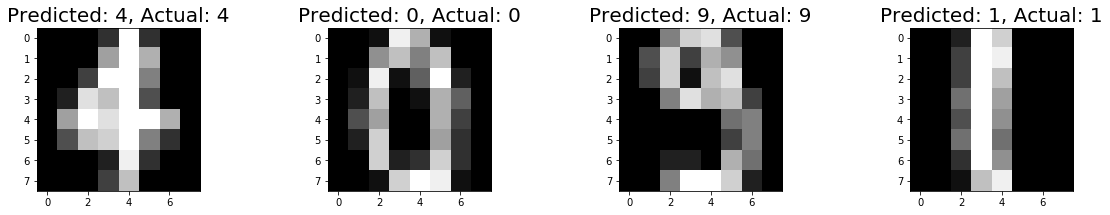

In [60]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
	if predict==actual:
		misclassifiedIndex.append(index)
	index += 1

plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
	plt.subplot(1,4,plotIndex+1)
	plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
	plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=20)
plt.show()

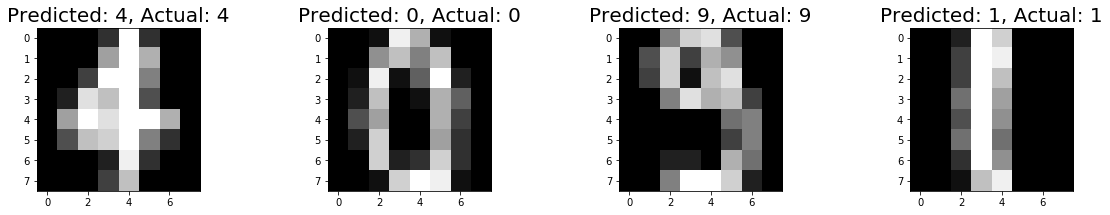

In [61]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
	if predict==actual:
		classifiedIndex.append(index)
	index += 1

plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
	plt.subplot(1,4,plotIndex+1)
	plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
	plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=20)
plt.show()